In [1]:
import pandas as pd
red_wine = pd.read_csv('data/winequality-red.csv',sep=';')
white_wine = pd.read_csv('data/winequality-white.csv', sep=';')

In [2]:
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
red_wine = red_wine[['alcohol', 'residual sugar','pH']]
red_wine.rename(columns={'residual sugar' : 'sugar'},inplace=True)
red_wine['class'] = 0
red_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  1599 non-null   float64
 1   sugar    1599 non-null   float64
 2   pH       1599 non-null   float64
 3   class    1599 non-null   int64  
dtypes: float64(3), int64(1)
memory usage: 50.1 KB


In [4]:
white_wine = white_wine[['alcohol','residual sugar','pH']]
white_wine.rename(columns = {'residual sugar' : 'sugar'},inplace = True)
white_wine['class'] = 1
white_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  4898 non-null   float64
 1   sugar    4898 non-null   float64
 2   pH       4898 non-null   float64
 3   class    4898 non-null   int64  
dtypes: float64(3), int64(1)
memory usage: 153.2 KB


In [5]:
# 레드와인 데이터와 화이트와인 데이터 합치기
wine = pd.concat([red_wine, white_wine])  #=>데이터 위아래로 합침
wine.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   int64  
dtypes: float64(3), int64(1)
memory usage: 253.8 KB


# **1.Decision Tree**

### 1-1. 데이터셋 생성

In [6]:
data = wine[['alcohol', 'sugar', 'pH']]
target = wine[['class']]

### 1-2. 훈련데이터와 검증데이터 분리

In [7]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(data, target)

### 1-3. 데이터 전처리

In [8]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [9]:
# 1. scaler 생성
# 2. 학습 데이터에 대해 fit
# 3. 학습 데이터에 대해 transform
# 4. 학습데이터를 스케일링한 scaler로 테스트 데이터도 transform (fit은 하지 않음!)

### 1-4. DecisionTree 모델 적합

In [12]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth = 50)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.9971264367816092
0.864


<function matplotlib.pyplot.show(close=None, block=None)>

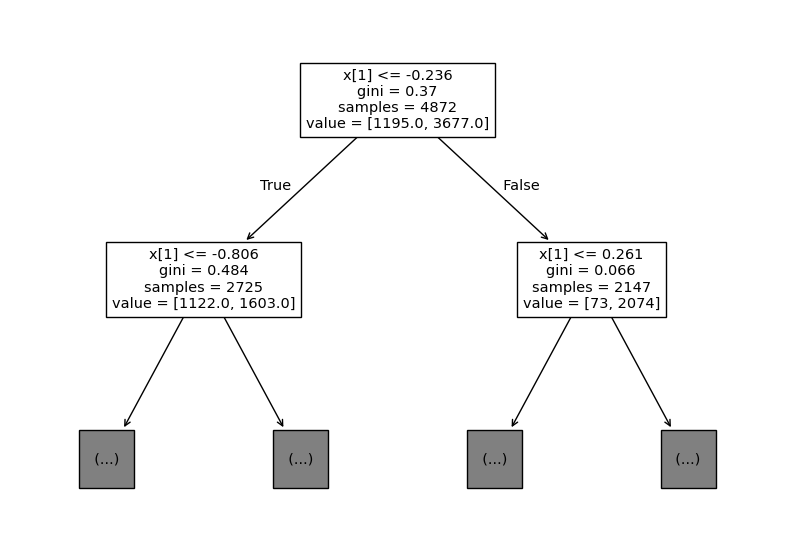

In [13]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1)
plt.show